In [2]:
import matplotlib.pyplot as plt
import numpy as np

# INITALIZATION FIELDS

In [ ]:
# VELOCITY FIELD
x,y = np.meshgrid(np.linspace(-np.pi, np.pi, 25), 
                   np.linspace(-np.pi, np.pi, 25))

u = np.sin(x)*np.cos(y)
v = -np.cos(x)*np.sin(y)
velocity_field = [u,v]

x_fine,y_fine = np.meshgrid(np.linspace(-np.pi, np.pi, 1000), 
                   np.linspace(-np.pi, np.pi, 1000))

u_fine = np.sin(x_fine)*np.cos(y_fine)
v_fine = -np.cos(x_fine)*np.sin(y_fine)

magnitude = np.sqrt(np.add(np.square(u),np.square(v)))
magnitude_fine = np.sqrt(np.add(np.square(u_fine),np.square(v_fine)))


fs=18

fig, ax = plt.subplots(1, 2, figsize=(20,10))
qv = ax[0].quiver(x, y, u, v, magnitude, cmap='coolwarm', scale=20, headwidth=5, width=0.0035)
ax[0].set_title('Velocity (m/s)\n', fontsize=fs)
ax[0].set_xlabel('x', fontsize=fs-5)
ax[0].set_ylabel('y', fontsize=fs-5)
ax[0].set(aspect='equal')

mag = ax[1].imshow(magnitude_fine, cmap='coolwarm', extent=[-np.pi, np.pi, -np.pi, np.pi])
ax[1].set_title('Velocity Magnitude (m/s)\n', fontsize=fs)
ax[1].set_xlabel('x', fontsize=fs-5)
ax[1].set_ylabel('y', fontsize=fs-5)
ax[1].set(aspect='equal')
ax[1].yaxis.set_tick_params(labelleft=True)
fig.colorbar(qv, aspect=40, ax=[ax[0]], shrink=0.75)
fig.colorbar(qv, aspect=40, ax=[ax[1]], shrink=0.75)

plt.savefig("images/initial_velocity_field.jpg", bbox_inches='tight')

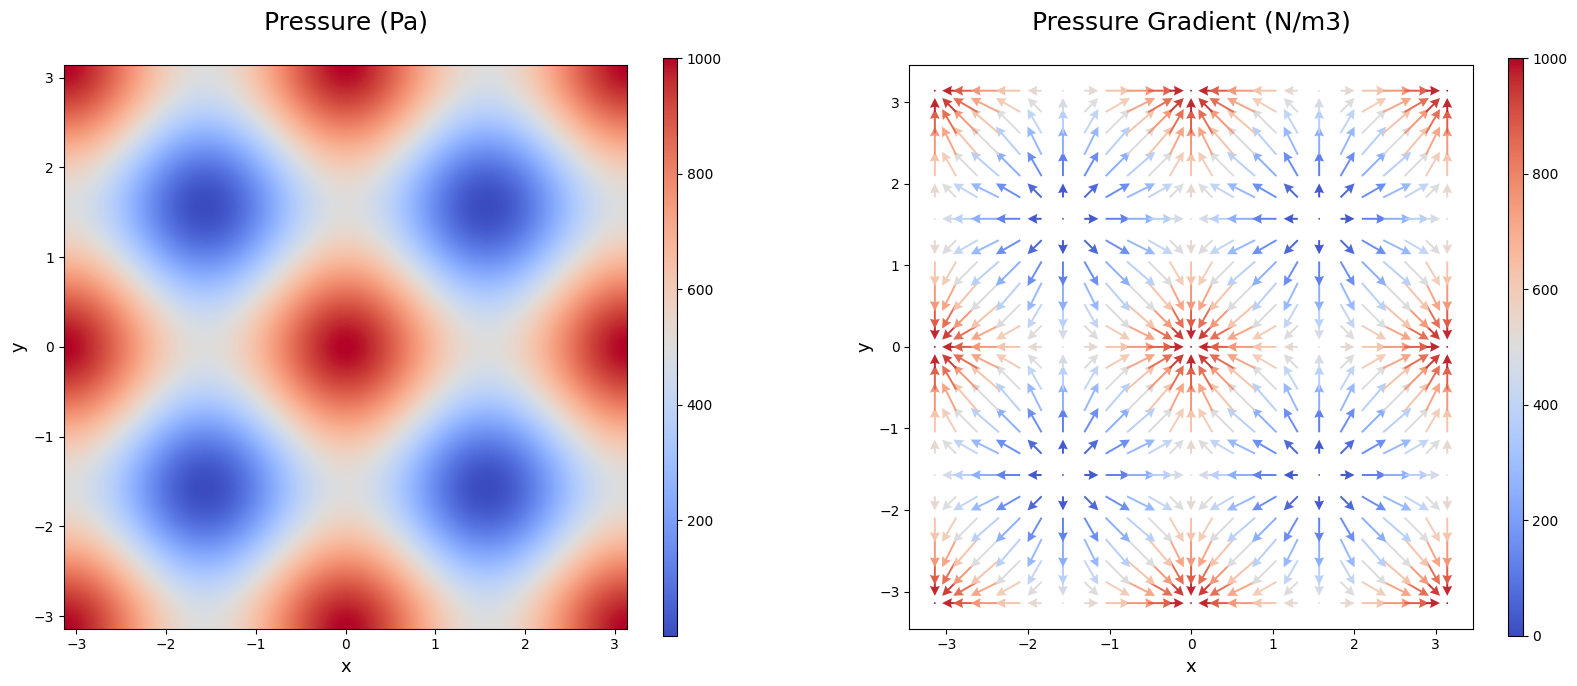

In [4]:
# VELOCITY FIELD

rho = 1000

p_fine = 0.5*rho*(np.cos(x_fine)**2 + np.cos(y_fine)**2)

grad_p_x = -rho*np.cos(x)*np.sin(x)
grad_p_y = -rho*np.cos(y)*np.sin(y)
p = 0.5*rho*(np.cos(x)**2 + np.cos(y)**2)

fig, ax = plt.subplots(1, 2, figsize=(20,10))
qv = ax[1].quiver(x, y, grad_p_x, grad_p_y, p, cmap='coolwarm', scale=1e4, headwidth=5, width=0.0035)
ax[1].set_title('Pressure Gradient (N/m3)\n', fontsize=fs)
ax[1].set_xlabel('x', fontsize=fs-5)
ax[1].set_ylabel('y', fontsize=fs-5)
ax[1].set(aspect='equal')

pre = ax[0].imshow(p_fine, cmap='coolwarm', extent=[-np.pi, np.pi, -np.pi, np.pi])
ax[0].set_title('Pressure (Pa)\n', fontsize=fs)
ax[0].set_xlabel('x', fontsize=fs-5)
ax[0].set_ylabel('y', fontsize=fs-5)
ax[0].set(aspect='equal')
ax[0].yaxis.set_tick_params(labelleft=True)
fig.colorbar(pre, aspect=40, ax=[ax[0]], shrink=0.75)
fig.colorbar(qv, aspect=40, ax=[ax[1]], shrink=0.75)

plt.savefig("images/initial_pressure_field.jpg", bbox_inches='tight')


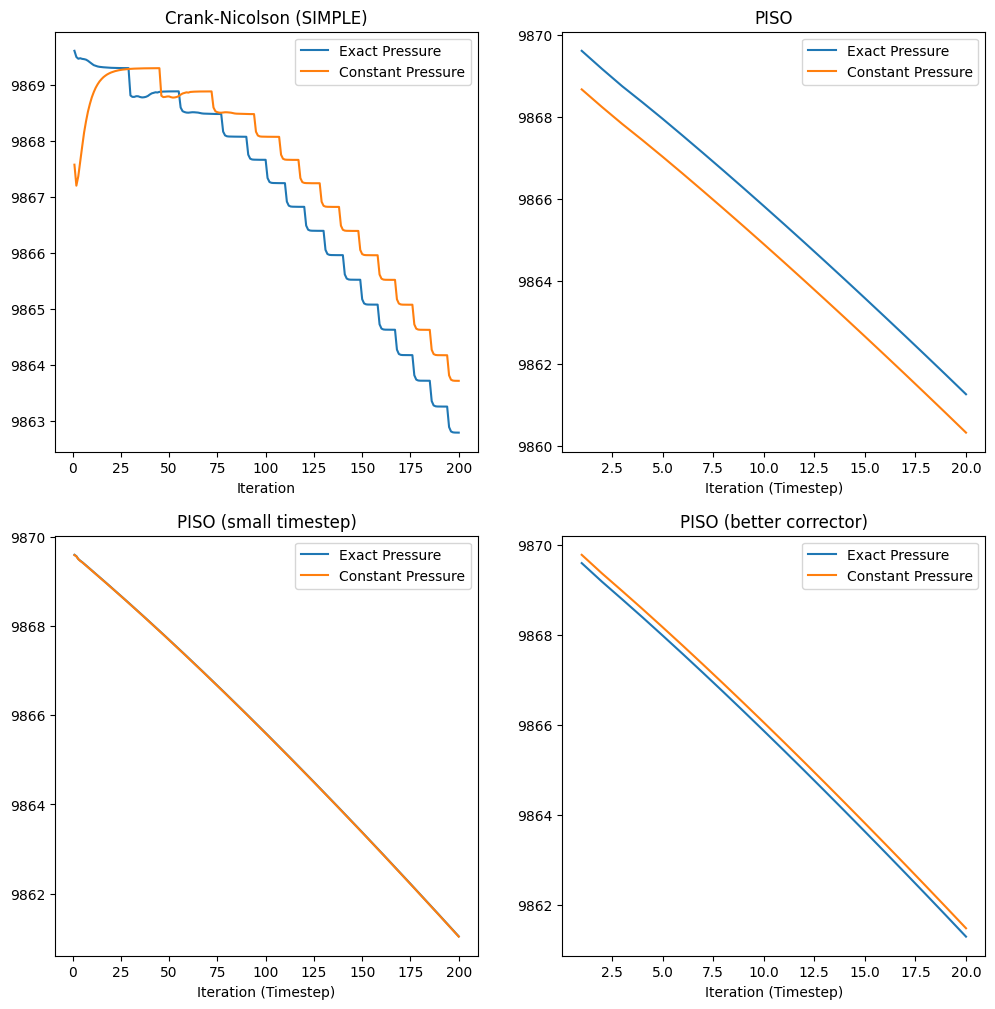

In [5]:
# IMPORTANCE OF PRESSURE INITIALIZATION

# CN
cn_good_data = np.genfromtxt('data/pressure_initialization/CN-MUSCL_correct_initialization.csv', delimiter=',', skip_header=1)
cn_bad_data = np.genfromtxt('data/pressure_initialization/CN-MUSCL_constant_initialization.csv', delimiter=',', skip_header=1)

cn_good_data = cn_good_data[:-5]
cn_bad_data = cn_bad_data[:-7]

cn_iterations = cn_good_data[:,0]
cn_good = cn_good_data[:,1]
cn_bad = cn_bad_data[:,1]


# PISO
piso_good_data = np.genfromtxt('data/pressure_initialization/PISO-MUSCL_correct_initialization.csv', delimiter=',', skip_header=1)
piso_bad_data = np.genfromtxt('data/pressure_initialization/PISO-MUSCL_constant_initialization.csv', delimiter=',', skip_header=1)

piso_iterations = piso_good_data[:,0]
piso_good = piso_good_data[:,1]
piso_bad = piso_bad_data[:,1]

# PISO small
pisosmall_good_data = np.genfromtxt('data/pressure_initialization/PISO(small)-MUSCL_correct_initialization.csv', delimiter=',', skip_header=1)
pisosmall_bad_data = np.genfromtxt('data/pressure_initialization/PISO(small)-MUSCL_constant_initialization.csv', delimiter=',', skip_header=1)

pisosmall_iterations = pisosmall_good_data[:,0]
pisosmall_good = pisosmall_good_data[:,1]
pisosmall_bad = pisosmall_bad_data[:,1]

# PISO small
pisostrict_good_data = np.genfromtxt('data/pressure_initialization/PISO(strict)-MUSCL_correct_initialization.csv', delimiter=',', skip_header=1)
pisostrict_bad_data = np.genfromtxt('data/pressure_initialization/PISO(strict)-MUSCL_constant_initialization.csv', delimiter=',', skip_header=1)

pisostrict_iterations = pisostrict_good_data[:,0]
pisostrict_good = pisostrict_good_data[:,1]
pisostrict_bad = pisostrict_bad_data[:,1]

# PLOT
fig, ax = plt.subplots(2, 2, figsize=(12,12))
ax[0,0].plot(cn_iterations, np.array(cn_good)*np.pi*np.pi*1000/cn_good[0], label='Exact Pressure')
ax[0,0].plot(cn_iterations, np.array(cn_bad)*np.pi*np.pi*1000/cn_good[0], label='Constant Pressure')
ax[0,0].set_title('Crank-Nicolson (SIMPLE)')
ax[0,0].set_xlabel('Iteration')
ax[0,0].legend()

ax[0,1].plot(piso_iterations, np.array(piso_good)*np.pi*np.pi*1000/piso_good[0], label='Exact Pressure')
ax[0,1].plot(piso_iterations, np.array(piso_bad)*np.pi*np.pi*1000/piso_good[0], label='Constant Pressure')
ax[0,1].set_title('PISO')
ax[0,1].set_xlabel('Iteration (Timestep)')
ax[0,1].legend()

ax[1,0].plot(pisosmall_iterations, np.array(pisosmall_good)*np.pi*np.pi*1000/pisosmall_good[0], label='Exact Pressure')
ax[1,0].plot(pisosmall_iterations, np.array(pisosmall_bad)*np.pi*np.pi*1000/pisosmall_good[0], label='Constant Pressure')
ax[1,0].set_title('PISO (small timestep)')
ax[1,0].set_xlabel('Iteration (Timestep)')
ax[1,0].legend()

ax[1,1].plot(pisostrict_iterations, np.array(pisostrict_good)*np.pi*np.pi*1000/pisostrict_good[0], label='Exact Pressure')
ax[1,1].plot(pisostrict_iterations, np.array(pisostrict_bad)*np.pi*np.pi*1000/pisostrict_good[0], label='Constant Pressure')
ax[1,1].set_title('PISO (better corrector)')
ax[1,1].set_xlabel('Iteration (Timestep)')
ax[1,1].legend()



plt.savefig("images/initialization_bias.jpg", bbox_inches='tight')


# CONVERGENCE CRITERIA

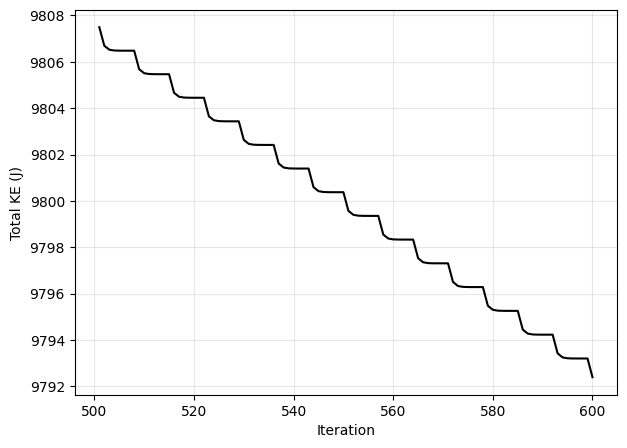

In [6]:
raw_data = np.genfromtxt("data/mesh_A/2nd_order/KE_iter.csv", delimiter=',', skip_header=1)

first = 500
last = 600

iter = [data[0] for data in raw_data]
KE = [data[1] for data in raw_data]

plt.figure(figsize=(7,5))
plt.plot(iter[first:last], np.array(KE[first:last])*1000, color='k', linewidth=1.5)
plt.ylabel("Total KE (J)")
plt.xlabel("Iteration")
plt.grid(which='both', alpha=0.3)

plt.savefig("images/convergence.jpg", bbox_inches='tight')

# RESULTS

In [7]:
meshes = ["A", "B", "C", "D", "E"]
interpolation_schemes = ["1st_order", "2nd_order", "MUSCL"]

data = []

for scheme in interpolation_schemes:
    mesh_data = []
    for mesh in meshes:
        raw_data = np.genfromtxt("data/mesh_{}/{}/KE_time.csv".format(mesh, scheme), delimiter=',', skip_header=1)
        first = raw_data[0][1] # first value of KE
        last = raw_data[-1][1] # last value of KE
        final = last/first

        
        mesh_data.append(final)
    data.append(mesh_data)
        

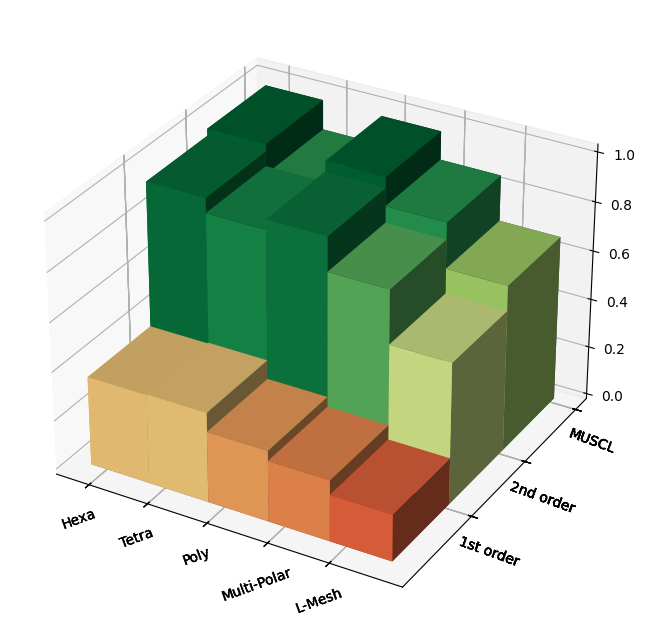

In [8]:
meshes_label = ["Hexa", "Tetra", "Poly", "Multi-Polar", "L-Mesh"]
schemes_label = ["1st order", "2nd order", "MUSCL"]

width = depth = 1

_x = range(len(meshes))
_y = range(len(interpolation_schemes))
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

_x_label = meshes_label
_y_label = schemes_label
_xx_label, _yy_label = np.meshgrid(_x_label, _y_label)
x_label, y_label = _xx_label.ravel(), _yy_label.ravel()


raveled_data = np.array(data).ravel()
bottom = np.zeros_like(raveled_data)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.bar3d(x=x, y=y, z=bottom, dx=width, dy=depth, dz=raveled_data, shade=True, color=plt.cm.RdYlGn(raveled_data/float(raveled_data.max())))
ax.set_xticks(ticks=x+0.2, labels=x_label, rotation=20)
ax.set_yticks(ticks=y+1, labels=y_label, rotation=-20)
ax.set_zlim(0,1.01)
plt.savefig("images/ke_barplot.jpg", bbox_inches='tight')

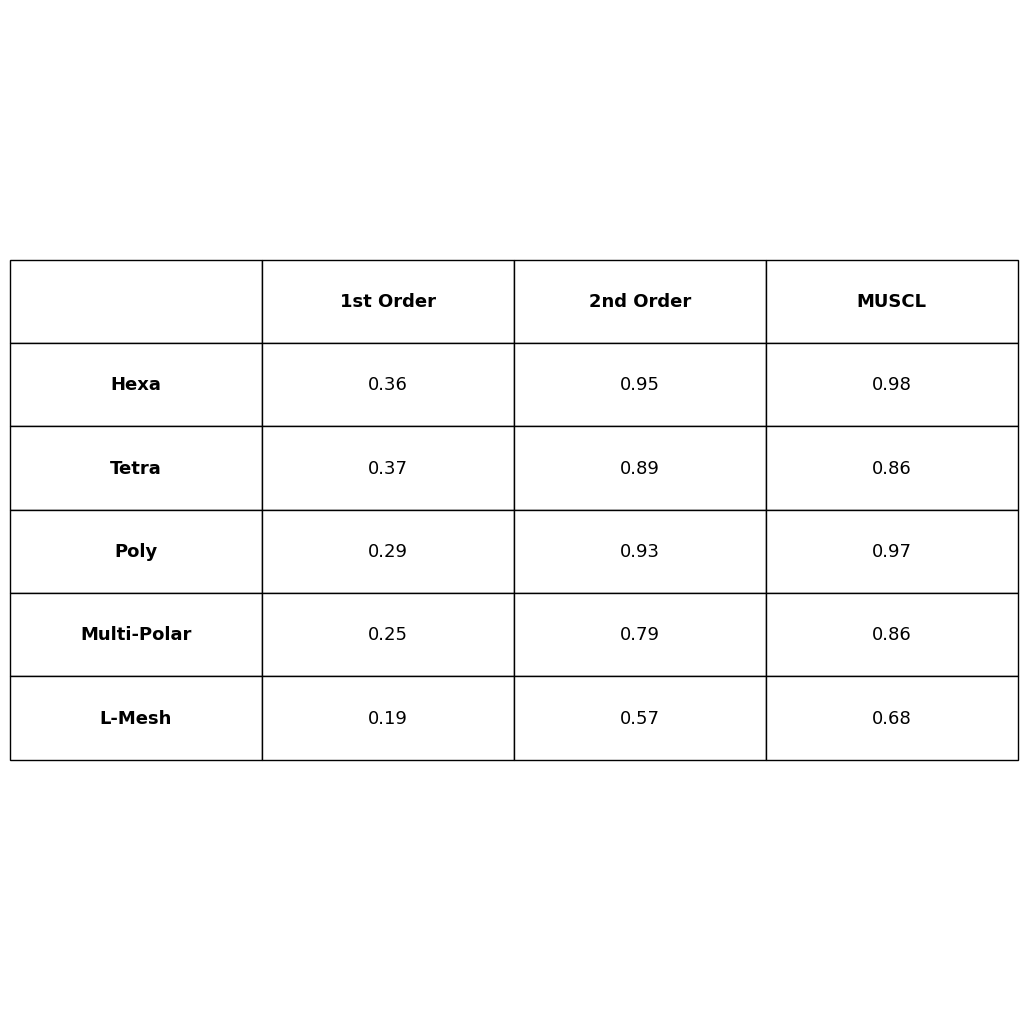

In [9]:
# TABLE
from matplotlib.font_manager import FontProperties

data = []
for mesh in meshes:
    scheme_data = []
    for scheme in interpolation_schemes:
        raw_data = np.genfromtxt("data/mesh_{}/{}/KE_time.csv".format(mesh, scheme), delimiter=',', skip_header=1)
        first = raw_data[0][1] # first value of KE
        last = raw_data[-1][1] # last value of KE
        final = last/first
        
        scheme_data.append(final)
    data.append(scheme_data)


data_labels = []
col_labels = ["", "1st Order", "2nd Order", "MUSCL"]
row_labels = np.array([["Hexa"], ["Tetra"], ["Poly"], ["Multi-Polar"], ["L-Mesh"]])


for i in range(len(data)):
    row = []
    for j in range(len(data[0])):
        string = "{:.2f}".format(data[i][j])
        row.append(string)
    data_labels.append(row)
    
    
data_labels = np.hstack((row_labels, data_labels))
data_labels = np.vstack((col_labels, data_labels))


fig, ax1 = plt.subplots(1,1, figsize=(13,13))
ax1.axis('off')
ax1.axis('tight')

the_table = ax1.table(cellText=data_labels, cellLoc='center', loc='center')
the_table.scale(1, 5)


for (row, col), cell in the_table.get_celld().items():
  if (row == 0) or (col == 0):
    cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    
the_table.set_fontsize(13)

plt.savefig("images/ke_table.jpg", bbox_inches='tight')

In [19]:
# PLOTS
meshes = ["A", "B", "C", "D", "E"]
interpolation_schemes = ["1st_order", "2nd_order", "MUSCL"]

data = []

for scheme in interpolation_schemes:
    mesh_data = []
    for mesh in meshes:
        raw_data = np.genfromtxt("data/mesh_{}/{}/KE_time.csv".format(mesh, scheme), delimiter=',', skip_header=1)
        time = []
        ke = []
        for timestep in raw_data:
            t = timestep[0]
            k = timestep[1]
            time.append(t)
            ke.append(k)
        mesh_data.append(ke)
    data.append(mesh_data)
    


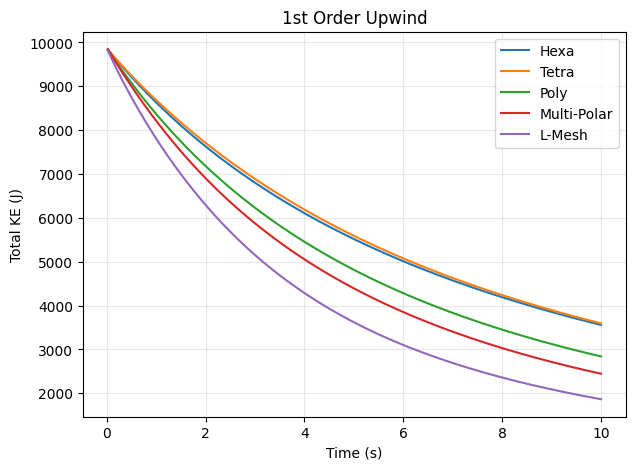

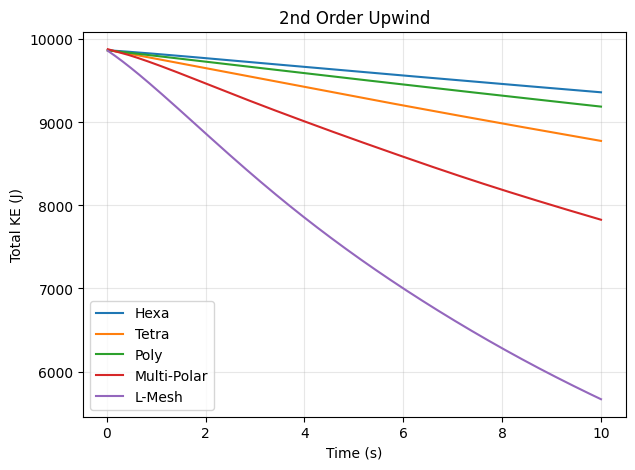

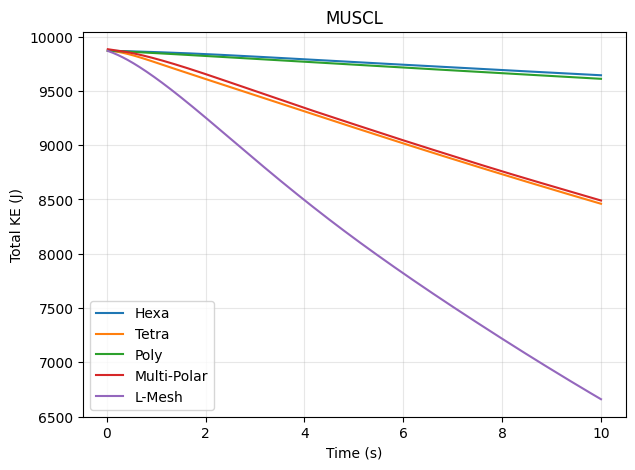

In [44]:
mesh_labels = ["Hexa", "Tetra", "Poly", "Multi-Polar", "L-Mesh"]

# 1st order upwind
plt.figure(figsize=(7,5))
idx = 0
for i in range(len(data[idx])):
    plt.plot(time, np.array(data[idx][i])*1000, linewidth=1.5, label=mesh_labels[i])
    
plt.ylabel("Total KE (J)")
plt.xlabel("Time (s)")
plt.grid(which='both', alpha=0.3)
plt.legend()
plt.title("1st Order Upwind")
plt.savefig("images/1st_order.jpg", bbox_inches='tight')



# 2nd order upwind
plt.figure(figsize=(7,5))
idx = 1
for i in range(len(data[idx])):
    plt.plot(time, np.array(data[idx][i])*1000, linewidth=1.5, label=mesh_labels[i])
    
plt.ylabel("Total KE (J)")
plt.xlabel("Time (s)")
plt.grid(which='both', alpha=0.3)
plt.legend()
plt.title("2nd Order Upwind")
plt.savefig("images/2nd_order.jpg", bbox_inches='tight')



# MUSCL
plt.figure(figsize=(7,5))
idx = 2
for i in range(len(data[idx])):
    plt.plot(time, np.array(data[idx][i])*1000, linewidth=1.5, label=mesh_labels[i])
    
plt.ylabel("Total KE (J)")
plt.xlabel("Time (s)")
plt.grid(which='both', alpha=0.3)
plt.legend()
plt.title("MUSCL")
plt.savefig("images/MUSCL.jpg", bbox_inches='tight')